In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#%load_ext nb_black

In [2]:
"""
machine learnign algorithms are categorized into 3 categories
supervised learning where in dataset you have class label or target variable
unsupervised learning you have set of features, you don't havea target variable or class label
    using this data set try to identify underlyng structure in data 
    kmeans is a clustering algorithm
    Have to tell algorithm the vlaue of k you are looking for
    How to detremine corret number of clusters? Elbow method
        As you increases number of clusters it will increase error
    identify 2 random points which youconsider center of clsuters, called centroids. If k is 3 put 3 random points
    Idenitfy distance of data points to centroids

By clustering data want to find some characeristics of groups
    Does group blong to partucliar region in US where salaries higher or lower

reinforcement learning
"""
df = pd.read_csv('data/IMDb movies.csv', error_bad_lines=False)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
df.shape

(85855, 22)

In [5]:
df.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [7]:
df.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [8]:
df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [9]:
features = ['duration']

data = df[features].copy()
data.fillna(-999, inplace=True) #fill null vlaues with -999
data = data.values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
"""
the data has been standardized
"""
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1,1))
print(data)

[[-2.45420385]
 [-1.34573909]
 [-2.09949512]
 ...
 [ 1.31457632]
 [-0.10425856]
 [-1.16838473]]


In [12]:
from sklearn.cluster import KMeans
from time import time

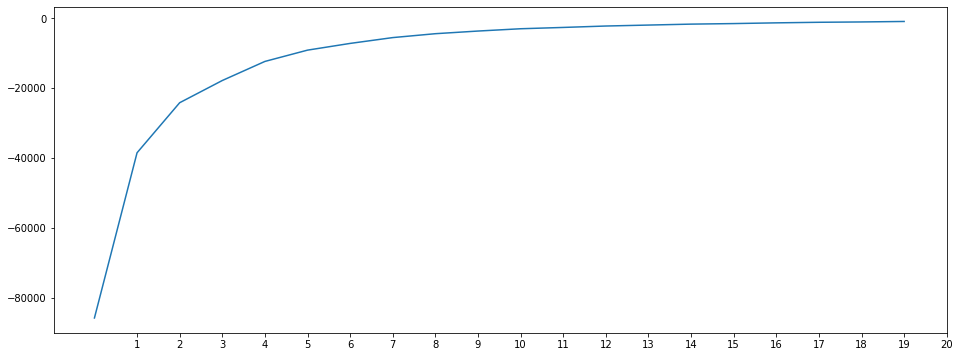

In [13]:
"""
we don't know anythin abouit data. We don't know wha tis best number of clusters to best split the data
We need ot find optimal number of clusters
Problems are : 1)need to find optimal number of clusters and 2) need to know where location of clusters are
We need to calcualte model's inertia. 
inertia is just the mean squared distnce between the records and their centroids
we need a low intertia. The lower inertia the better b/c that means the centroid is in its best location, therefore
    minimizing the mean squared distance between those and by default the algorithm runs a number of times and then it
    keeps hte model with the lowest mean squared distance.
If we have a # of clusters equal tothe number of observations that would mean that the distance will be minimum

Way to find optimal number of clusters is by using the elbow method.  
going t ogo throug ha range of 1 to 20 clusters
then going to fit hte data with specific amount of clusters
going to calcualte scores for each model and then plot
pick hte elbow of the curve as the number of clusters
wit heach new run intertia gets closet to 0
"""
#%%time
n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)


In [14]:
"""
get the best number of clisters based on elbow method, where the difference between scores is smaller than 90%
    percentile
"""

scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

16


In [15]:
"""
let's check the 1st observation
"""

preds = KMeans(n_clusters = n_clusters).fit_predict(data)
print(f"First observation's cluster: {preds[0]}")

First observation's cluster: 5


In [16]:
"""
how ca nwe use kmeans for anamoly detection
going to select clusters that have least amount of observations

We took last 2 clusters based on their value count
"""
df = pd.DataFrame(df)
df['cluster'] = preds

outliers = [
    x
    for x in zip(
        df['cluster'].value_counts().iloc[-2:].index,
        df['cluster'].value_counts().iloc[-2:].values,
    )
]

In [17]:
"""
we're going to take cluster 13 that has only 2 observations
cluster 5 has 14 observations
"""

df['cluster'].value_counts()

10    18111
3     13427
15    12251
0     11163
1      7353
13     5438
12     4989
6      4000
9      3208
2      2382
5      2344
7       965
11      161
4        47
8        14
14        2
Name: cluster, dtype: int64

In [18]:
"""
list of tuples
1st item in tuple is predicted cluster, 2nd is number of observations

"""

outliers

[(8, 14), (14, 2)]

In [19]:
"""
get onl the categories that contain a number of observations in the lower quartile of 1%

"""
clusters = [
    x[0]
    for x in outliers
    if x[1] < np.quantile(df['cluster'].value_counts().values, 0.01) 
    
]

In [20]:
"""


"""
clusters

[14]

In [21]:
"""
print records in cluster 2
we have feature b/ we're only analyzing feature duration
a duration of 729
"""
for c in clusters:
    print(df[df.cluster == c][features])
    

       duration
38038       729
85057       808


In [22]:
"""
we can see that maximum i 808
mean and std show this is an extreme value
"""

df[features].describe()

,duration
count,85855.000000
mean,100.351418
std,22.553848
min,41.000000
25%,88.000000
50%,96.000000
75%,108.000000
max,808.000000


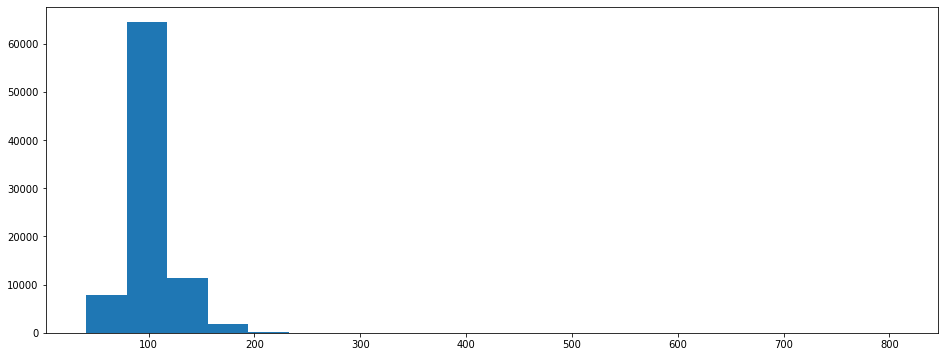

In [23]:
"""
we jave observations up until 800
pretty obvious we have outliers
"""

f = plt.figure(1, figsize=(16,6))
_ = plt.hist(df[features].values, bins=20)

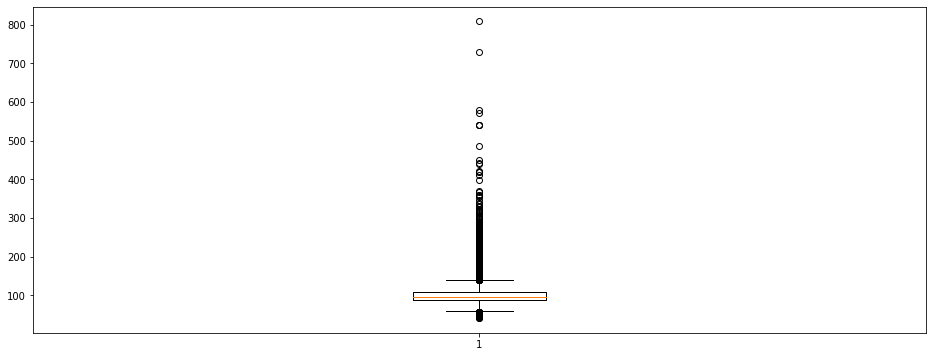

In [24]:
"""
outliers around 800
problem could have easily been solved by plotting boxplot or gettingthe histogram data
"""

f = plt.figure(1, figsize=(16,6))
_ = plt.boxplot(df[features].values)

In [25]:
features = ['duration','votes','reviews_from_users']

data = df[features].copy()
data.fillna(-999, inplace=True) #fill null vlaues with -999
data = data.values
print(data)

[[  45.  154.    1.]
 [  70.  589.    7.]
 [  53.  188.    5.]
 ...
 [ 130.  265. -999.]
 [  98.  194. -999.]
 [  74.  102. -999.]]


In [26]:
data_1 = data.copy()

In [27]:
"""
b/c we have multiple feature we donlt need ot reshape data
"""
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data)

[[-2.45420385 -0.17432862  0.13858782]
 [-1.34573909 -0.16620901  0.15611908]
 [-2.09949512 -0.17369398  0.15027533]
 ...
 [ 1.31457632 -0.17225672 -2.78329018]
 [-0.10425856 -0.17358199 -2.78329018]
 [-1.16838473 -0.17529924 -2.78329018]]


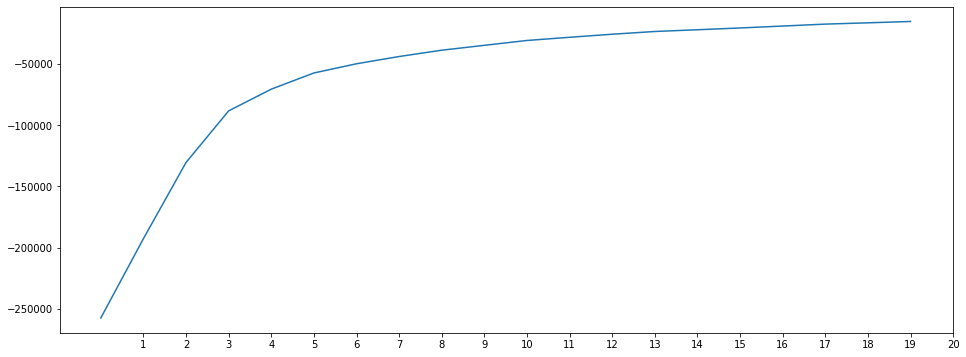

In [28]:
"""
KMeans algorithm with multiple numerical features
elbow looks more dlearly defined
"""
#%%time
n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)


In [29]:
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

16


In [30]:

preds = KMeans(n_clusters = n_clusters).fit_predict(data)
print(f"First observation's cluster: {preds[0]}")

First observation's cluster: 0


In [31]:
df = pd.DataFrame(df)
df['cluster'] = preds

outliers = [
    x
    for x in zip(
        df['cluster'].value_counts().iloc[-2:].index,
        df['cluster'].value_counts().iloc[-2:].values,
    )
]

In [32]:
#cluster 14 with 14 values
df['cluster'].value_counts()

8     31450
2     19947
0      9557
6      8606
11     6190
14     4096
12     2294
3      1390
5       919
1       711
15      391
13      162
9        56
10       54
4        19
7        13
Name: cluster, dtype: int64

In [33]:
outliers

[(4, 19), (7, 13)]

In [34]:
#ouliersin lower 10% of data
clusters = [
    x[0]
    for x in outliers
    if x[1] < np.quantile(df['cluster'].value_counts().values, 0.10) 
    
]

In [35]:
#we get 2 clusters
clusters

[4, 7]

In [36]:
#print out our anamolies/outliers
#use KMeans t odetect outliers in a dataset
for c in clusters:
    print(df[df.cluster == c][features])
    

       duration   votes  reviews_from_users
31387       136  713119              3856.0
31430       142  625761              3660.0
31431       140  694239              3569.0
35252        81  227601              3527.0
52592       106   10943              5261.0
52820       112   21614              4866.0
56282       112  343608              3632.0
58512       143  348878              3883.0
61357       134  433549              3367.0
67523       138  845102              4822.0
67676       152  547797              6718.0
67677       141  347274              7553.0
69334       152  612550              3766.0
73863       123  422676              7207.0
73864       149  796486              4273.0
73865       181  754786              8869.0
81897       161  507214              5166.0
82239       122  855097             10472.0
83783       101  101686              7639.0
       duration    votes  reviews_from_users
15528       175  1572674              3977.0
28066       142  1755490      

In [37]:
df[features].describe()

,duration,votes,reviews_from_users
count,85855.000000,8.585500e+04,78258.000000
mean,100.351418,9.493490e+03,46.040826
std,22.553848,5.357436e+04,178.511411
min,41.000000,9.900000e+01,1.000000
25%,88.000000,2.050000e+02,4.000000
50%,96.000000,4.840000e+02,9.000000
75%,108.000000,1.766500e+03,27.000000
max,808.000000,2.278845e+06,10472.000000


In [38]:
df_data = pd.read_csv('data/IMDb movies.csv', error_bad_lines=False)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
features_1 = ['duration','votes','reviews_from_users']
data = df_data[features_1]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            85855 non-null  int64  
 1   votes               85855 non-null  int64  
 2   reviews_from_users  78258 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


In [41]:
data.isna().sum()

duration                 0
votes                    0
reviews_from_users    7597
dtype: int64

In [42]:
data.shape

(85855, 3)

In [43]:
data.dropna(inplace=True)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data.shape

(78258, 3)

In [45]:
data.head()

,duration,votes,reviews_from_users
0,45,154,1.0
1,70,589,7.0
2,53,188,5.0
3,100,446,25.0
4,68,2237,31.0


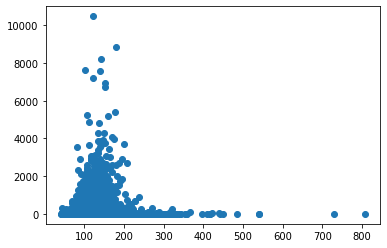

In [46]:
plt.scatter(data['duration'], data['reviews_from_users'])

In [47]:
data.describe()

,duration,votes,reviews_from_users
count,78258.000000,7.825800e+04,78258.000000
mean,100.353715,1.038250e+04,46.040826
std,22.412007,5.602692e+04,178.511411
min,41.000000,9.900000e+01,1.000000
25%,88.000000,2.260000e+02,4.000000
50%,96.000000,5.580000e+02,9.000000
75%,108.000000,2.134000e+03,27.000000
max,808.000000,2.278845e+06,10472.000000


In [48]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [49]:
#fit and predict
#told it to identify 3 clusters, it assigns different labels
y_predicted = km.fit_predict(data[['duration','votes','reviews_from_users']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [50]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [51]:
#plot to see what kind of clustering it produced
data['cluster'] = y_predicted

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
data.shape

(78258, 4)

In [53]:
data['cluster'].value_counts()

0    76648
2     1415
1      195
Name: cluster, dtype: int64

In [54]:
df1 = data[data['cluster']== 0]
df2 = data[data['cluster']== 1]
df3 = data[data['cluster']== 2]
#df4 = data_1[data_1['cluster']== 3]
#plt.scatter()

In [55]:
df1

,duration,votes,reviews_from_users,cluster
0,45,154,1.0,0
1,70,589,7.0,0
2,53,188,5.0,0
3,100,446,25.0,0
4,68,2237,31.0,0
...,...,...,...,...
85844,106,318,27.0,0
85846,92,764,29.0,0
85847,120,494,1.0,0
85849,122,491,9.0,0


No handles with labels found to put in legend.


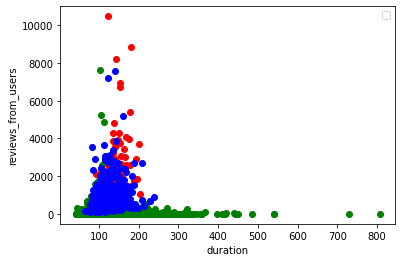

In [56]:
#they are not group correctly
#scaling isn't right
#reviews are from 0 to 10000 and duration 0 to 800
plt.scatter(df1['duration'],df1['reviews_from_users'], color='green')
plt.scatter(df2['duration'],df2['reviews_from_users'], color='red')
plt.scatter(df3['duration'],df3['reviews_from_users'], color='blue')
plt.xlabel('duration')
plt.ylabel('reviews_from_users')
plt.legend()

In [57]:
#use minmax scalre to scale hte 2 features
from sklearn.preprocessing import MinMaxScaler

In [58]:
X = data[['duration','reviews_from_users']]

In [59]:
#make values o to 1
scaler = MinMaxScaler()
scaler.fit(data[['duration','reviews_from_users']])
data[['duration','reviews_from_users']] = scaler.transform(data[['duration','reviews_from_users']])

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [60]:
data

,duration,votes,reviews_from_users,cluster
0,0.005215,154,0.000000,0
1,0.037810,589,0.000573,0
2,0.015645,188,0.000382,0
3,0.076923,446,0.002292,0
4,0.035202,2237,0.002865,0
...,...,...,...,...
85844,0.084746,318,0.002483,0
85846,0.066493,764,0.002674,0
85847,0.102999,494,0.000000,0
85849,0.105606,491,0.000764,0


In [61]:
km_1 = KMeans(n_clusters=3)
km_1

KMeans(n_clusters=3)

In [62]:
y_predicted_1 = km_1.fit_predict(data[['duration','reviews_from_users']])
y_predicted_1

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [63]:
km_1.cluster_centers_

array([[0.05956272, 0.00220237],
       [0.08939315, 0.00524868],
       [0.14588954, 0.01443382]])

In [64]:
data['cluster'] = y_predicted_1

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
data.head()

,duration,votes,reviews_from_users,cluster
0,0.005215,154,0.000000,0
1,0.037810,589,0.000573,0
2,0.015645,188,0.000382,0
3,0.076923,446,0.002292,1
4,0.035202,2237,0.002865,0


No handles with labels found to put in legend.


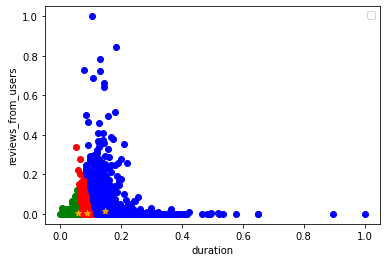

In [66]:
#clusters are better
df1 = data[data['cluster']== 0]
df2 = data[data['cluster']== 1]
df3 = data[data['cluster']== 2]
plt.scatter(df1['duration'],df1['reviews_from_users'], color='green')
plt.scatter(df2['duration'],df2['reviews_from_users'], color='red')
plt.scatter(df3['duration'],df3['reviews_from_users'], color='blue')
#these are the centers of my clusters
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], color='orange',marker='*') #want all the rows. 0 is 1st column. Y is 1st clumn
plt.xlabel('duration')
plt.ylabel('reviews_from_users')
plt.legend()


In [67]:
"""
elbow technique
"""
k_nrg = range(1,10)
sse = [] #sum squared error is an array
for k in k_nrg:
    km = KMeans(n_clusters=k)
    km.fit(data[['duration','reviews_from_users']])
    sse.append(km.inertia_) #parameter inertia will giv you sum of squared error

In [68]:
#sse very high then reducing
sse

[89.56270202950488,
 52.09587323981448,
 40.74470515669162,
 29.741413130389564,
 24.77228173895585,
 20.373914813349437,
 16.306330850828076,
 13.844548608218844,
 11.718664729093625]

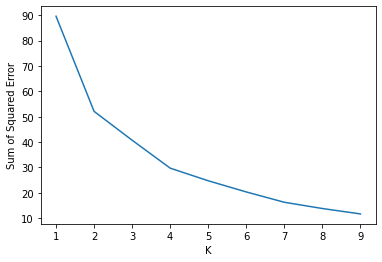

In [69]:
#where is the elbow
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_nrg, sse)

In [70]:
km_2 = KMeans(n_clusters=2)
km_2

KMeans(n_clusters=2)

In [71]:
y_predicted_2 = km_2.fit_predict(data[['duration','reviews_from_users']])
y_predicted_2

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [72]:
km_2.cluster_centers_

array([[0.06696008, 0.00282863],
       [0.12241343, 0.01066376]])

In [73]:
data['cluster'] = y_predicted_2

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
data

,duration,votes,reviews_from_users,cluster
0,0.005215,154,0.000000,0
1,0.037810,589,0.000573,0
2,0.015645,188,0.000382,0
3,0.076923,446,0.002292,0
4,0.035202,2237,0.002865,0
...,...,...,...,...
85844,0.084746,318,0.002483,0
85846,0.066493,764,0.002674,0
85847,0.102999,494,0.000000,1
85849,0.105606,491,0.000764,1


No handles with labels found to put in legend.


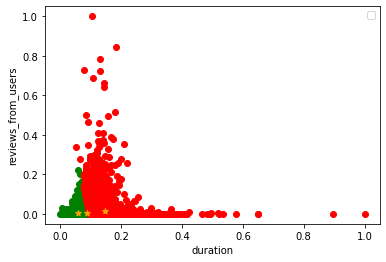

In [75]:
df1 = data[data['cluster']== 0]
df2 = data[data['cluster']== 1]

plt.scatter(df1['duration'],df1['reviews_from_users'], color='green')
plt.scatter(df2['duration'],df2['reviews_from_users'], color='red')

#these are the centers of my clusters
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], color='orange',marker='*') #want all the rows. 0 is 1st column. Y is 1st clumn
plt.xlabel('duration')
plt.ylabel('reviews_from_users')
plt.legend()


In [76]:
X = data.drop('cluster',axis=1)
y = data['cluster']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.82
